https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [104]:
import pandas as pd

In [105]:
# carga los datos de data/temps.csv
temps = pd.read_csv('/Users/carlosoliver/Desktop/BOOTCAMP/DataScience-Mar2024/3-Machine_Learning/1-Supervisado/3-Reg&Class/5-Decision_Trees/ejercicio/data/temps.csv', sep=',')

### 2. Lidia con las variables categóricas del dataset

In [106]:
# info
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [107]:
# decribe
temps.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [108]:
# valores unicos de la columna week
temps['week'].value_counts()

week
Tues     52
Fri      50
Sat      50
Sun      49
Mon      49
Wed      49
Thurs    49
Name: count, dtype: int64

In [109]:
# valores de la columna week
temps[['week']]

,week
0,Fri
1,Sat
2,Sun
3,Mon
4,Tues
...,...
343,Tues
344,Wed
345,Thurs
346,Fri


ESTO ES UN CODIGO PARA CAMBIAR CATEGORIAS A VALORES DE FORMA AUTOMATICA. ESTO COGE TODOS ESOS VALORES UNICOS DE WEEK Y LES ASIGNA UN NUMERO A CADA UNO. OJO!! NO TIENE PORQUE SER LUNES 1, MARTES 2, MIERCOLES 3 AND SO ON

In [110]:
# usamos todos los datos (sin train ni test) pero esto habria que negociarlo...
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(temps['week'])
le.transform(temps['week'])

array([0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5,
       6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 5, 3, 5, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,

OTRA FORMA SERIA HACER COLUMNAS DUMMIES:

In [111]:
pd.get_dummies(temps['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
343,False,False,False,False,False,True,False
344,False,False,False,False,False,False,True
345,False,False,False,False,True,False,False
346,True,False,False,False,False,False,False


PERO AL FINAL, USAMOS LA FORMA "MANUAL" 

In [112]:
#Reemplaza el valor de la columna week con un diccionario
my_dict = {'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6}

temps['week'] = temps['week'].replace(my_dict)

/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_4253/1041995591.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temps['week'] = temps['week'].replace(my_dict)


In [113]:
temps

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47
344,2016,12,28,2,42,47,45.3,48,41,49,44,58
345,2016,12,29,3,47,48,45.3,48,43,50,45,65
346,2016,12,30,4,48,48,45.4,57,44,46,44,42


SI LOS DATOS SON MUY VARIABLES, A VECES INTERESA MODIFICAR UNA COLUMNA POR UN AGREGADO.
OS ACORDAIS DE LOS AGREGADOS? AQUI SE PIDE AGREGAR TEMPERATURA POR MES USANDO LA MEDIA:

In [114]:
months_g = temps.groupby('month')['temp_1'].mean()
months_g

month
1     49.677419
2     54.115385
3     56.483871
4     66.433333
5     68.838710
6     73.233333
7     76.225806
8     77.947368
9     70.428571
10    63.900000
11    56.966667
12    43.741935
Name: temp_1, dtype: float64

ESTO LO DEJO. LO QUE HACEMOS ES UN JOIN PARA AGREGAR LA COLUMNA DE LA MEDIA MENSUAL AL DATO ORIGINAL
RECORDAD QUE NOS GENERARA UNA COLUMNA TEMP_1_X Y TEMP_1_Y POR QUE EL NOMBRE ESTA REPE

In [115]:
df = temps.merge(months_g, on='month')
df1 = df.pop('year')

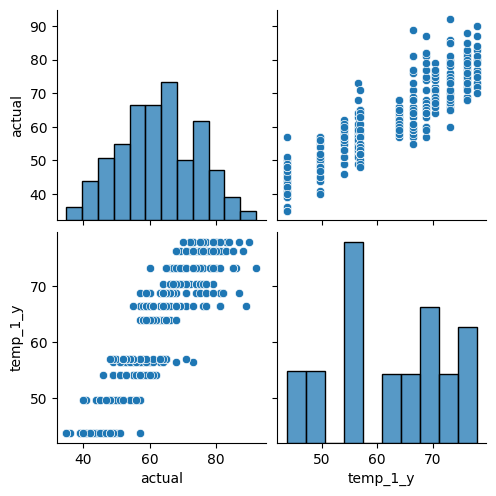

In [116]:
import seaborn as sns
sns.pairplot(df[['actual','temp_1_y']])

In [117]:
df

,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,1,1,4,45,45,45.6,45,43,50,44,29,49.677419
1,1,2,5,44,45,45.7,44,41,50,44,61,49.677419
2,1,3,6,45,44,45.8,41,43,46,47,56,49.677419
3,1,4,0,44,41,45.9,40,44,48,46,53,49.677419
4,1,5,1,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...,...,...
343,12,27,1,42,42,45.2,47,41,50,47,47,43.741935
344,12,28,2,42,47,45.3,48,41,49,44,58,43.741935
345,12,29,3,47,48,45.3,48,43,50,45,65,43.741935
346,12,30,4,48,48,45.4,57,44,46,44,42,43.741935


<Axes: >

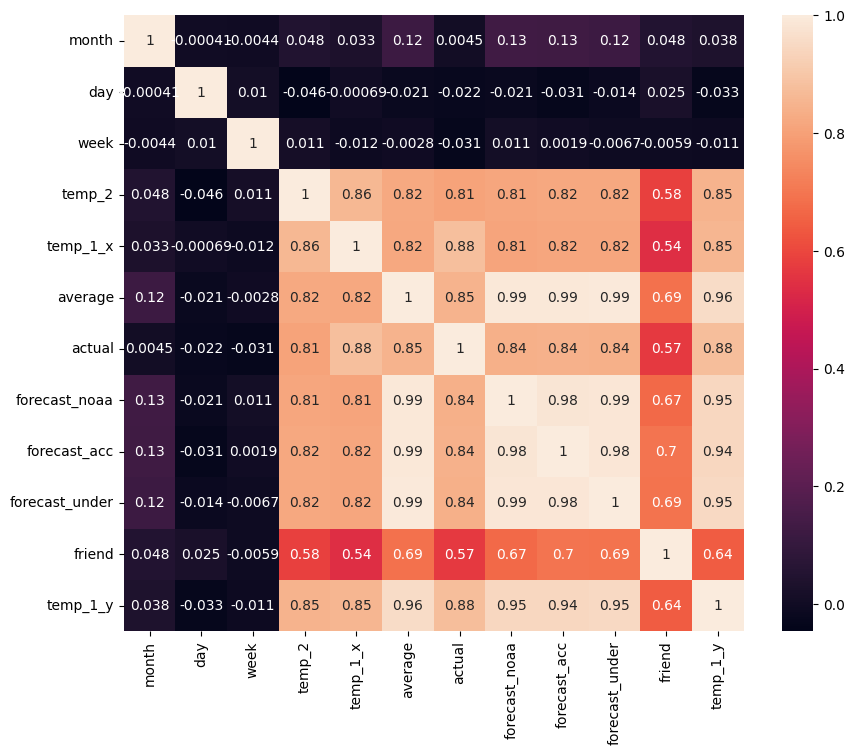

In [118]:
# HEATMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True)

### 3. Divide en train y test

HACEMOS UN TRAIN TEST SPLIT DONDE QUITAMOS LAS COLUMNAS ['year','day','week'] Y USAMOS ACTUAL COMO TARGET

In [119]:
df.drop(['day', 'week'], axis=1)

,month,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,1,45,45,45.6,45,43,50,44,29,49.677419
1,1,44,45,45.7,44,41,50,44,61,49.677419
2,1,45,44,45.8,41,43,46,47,56,49.677419
3,1,44,41,45.9,40,44,48,46,53,49.677419
4,1,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...
343,12,42,42,45.2,47,41,50,47,47,43.741935
344,12,42,47,45.3,48,41,49,44,58,43.741935
345,12,47,48,45.3,48,43,50,45,65,43.741935
346,12,48,48,45.4,57,44,46,44,42,43.741935


In [120]:
# train_test_split
import numpy as np
import os
from sklearn import tree, metrics, model_selection
from sklearn.model_selection import train_test_split


y = df['temp_1_y']
X = df.iloc[:,0:-1]


SyntaxError: invalid syntax (3389927198.py, line 10)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80, random_state = 42)


In [ ]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (80, 11)
X_test (268, 11)
y_train (80,)
y_test (268,)


### 4. Entrena el modelo


In [ ]:
from sklearn.tree import DecisionTreeRegressor
# el modelo se llama dtr
dtr = DecisionTreeRegressor()
#X_train e y_train
dtr.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
feature_importance = dtr.feature_importances_

# Crear un DataFrame para mostrar las características y su importancia
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar la importancia de las características
print(importance_df)

           Feature    Importance
5          average  9.631771e-01
0            month  2.693432e-02
8     forecast_acc  9.028725e-03
1              day  8.598642e-04
7    forecast_noaa  1.187401e-15
2             week  0.000000e+00
3           temp_2  0.000000e+00
4         temp_1_x  0.000000e+00
6           actual  0.000000e+00
9   forecast_under  0.000000e+00
10          friend  0.000000e+00


In [ ]:
# muestra la feature importance del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error



### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [ ]:
y_pred = dtr.predict(X_test)
y_pred


array([63.9       , 68.83870968, 43.74193548, 63.9       , 73.23333333,
       68.83870968, 76.22580645, 76.22580645, 56.96666667, 73.23333333,
       56.48387097, 73.23333333, 43.74193548, 66.43333333, 73.23333333,
       54.11538462, 56.96666667, 56.48387097, 54.11538462, 73.23333333,
       63.9       , 54.11538462, 73.23333333, 63.9       , 56.48387097,
       54.11538462, 68.83870968, 49.67741935, 68.83870968, 76.22580645,
       66.43333333, 68.83870968, 49.67741935, 76.22580645, 77.94736842,
       54.11538462, 54.11538462, 54.11538462, 70.42857143, 43.74193548,
       68.83870968, 56.48387097, 66.43333333, 49.67741935, 63.9       ,
       68.83870968, 56.48387097, 76.22580645, 56.48387097, 43.74193548,
       43.74193548, 49.67741935, 63.9       , 73.23333333, 70.42857143,
       63.9       , 54.11538462, 56.96666667, 56.48387097, 66.43333333,
       73.23333333, 54.11538462, 56.48387097, 70.42857143, 56.48387097,
       66.43333333, 73.23333333, 77.94736842, 76.22580645, 43.74

In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el Error Porcentual Absoluto Medio (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
#print("MAPE", mean_absolute_percentage_error(y_test, y_pred))

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular la Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)
#print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

# Imprimir los resultados
print("MAE:", mae)
print("MAPE:", mape)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 0.7308414688809006
MAPE: 1.1675701948163923
MSE: 4.50238154251348
RMSE: 2.1218816042638853


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.9569343746890198
MAE 0.7308414688809006
MAPE 0.011675701948163923
MSE 4.50238154251348
RMSE 2.1218816042638853


In [ ]:
print("Coeficiente determinación", r2_score(y_train, dtr.predict(X_train)))
print("MAE", mean_absolute_error(y_train, dtr.predict(X_train)))
print("MAPE", mean_absolute_percentage_error(y_train, dtr.predict(X_train)))
print("MSE", mean_squared_error(y_train, dtr.predict(X_train)))
print("RMSE", np.sqrt(mean_squared_error(y_train, dtr.predict(X_train))))

Coeficiente determinación 1.0
MAE 2.7533531010703883e-15
MAPE 4.845802386286869e-17
MSE 3.0923347484663665e-29
RMSE 5.5608765032738915e-15


### 6. Representa el árbol de decision

<Figure size 2000x3000 with 0 Axes>

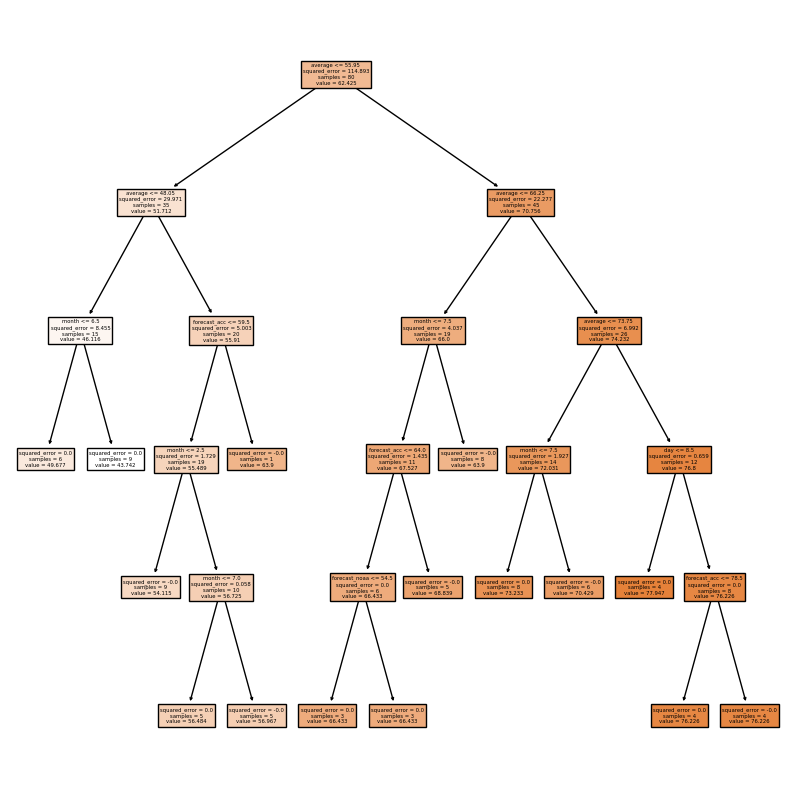

In [ ]:
plt.figure(figsize=(20,30))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Configuración para una mejor visualización
plt.figure(figsize=(10,10))
plot_tree(dtr, feature_names=X.columns, class_names=True,  filled=True)
plt.show()

# SI LO HABEIS HECHO BIEN, ENTENDEREIS PORQUE USAMOS max_depth PARA CAMBIAR la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [ ]:
# dtr3 = ...
dtr = DecisionTreeRegressor(max_depth= 3, random_state=0)
dtr.fit(X, y)


DecisionTreeRegressor(max_depth=3, random_state=0)

### 8. Vuelve a evaluar tu modelo

In [ ]:
y_pred = dtr.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.9813153879443658
MAE 0.9988213351809095
MAPE 0.0156041337295841
MSE 2.0404237939836913
RMSE 1.4284340355731135


### 9. Vuelve a representar su árbol

<Figure size 1500x1500 with 0 Axes>

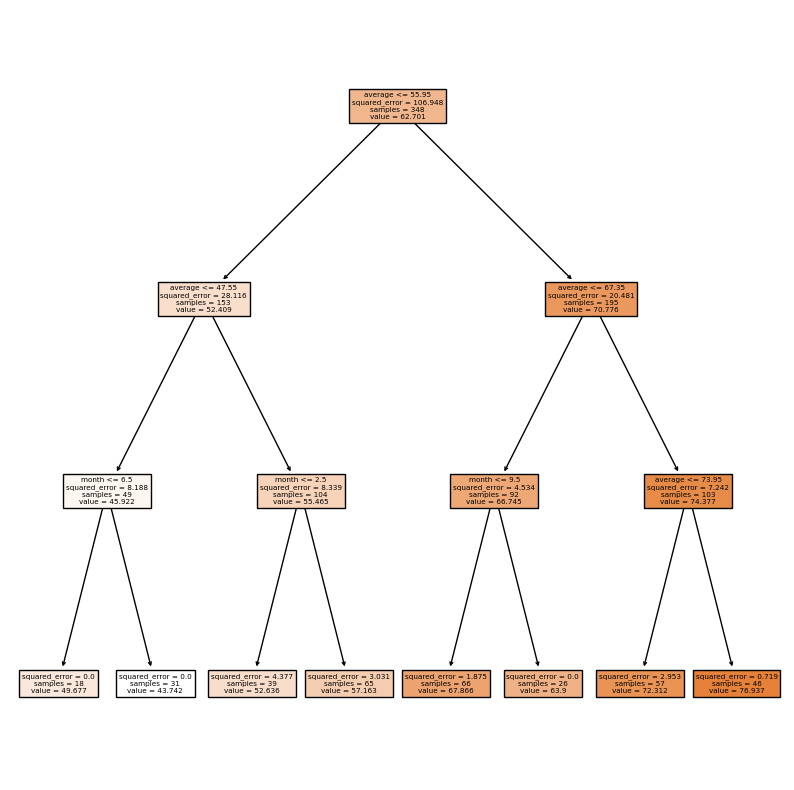

In [ ]:
plt.figure(figsize=(15,15))

# Configuración para una mejor visualización
plt.figure(figsize=(10,10))
plot_tree(dtr, feature_names=X.columns, class_names=True,  filled=True)
plt.show()

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [ ]:
# importancias
feature_importance = dtr.feature_importances_
feature_importance

array([2.69343245e-02, 8.59864223e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.63177087e-01, 0.00000000e+00, 1.18740055e-15,
       9.02872479e-03, 0.00000000e+00, 0.00000000e+00])

In [ ]:
# columnas de X_train
X_train.columns

Index(['month', 'day', 'week', 'temp_2', 'temp_1_x', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [121]:
import pandas as pd

# Crear un DataFrame con las características y sus importancias
data = {
    'features': ['month', 'day', 'week', 'temp_2', 'temp_1_x', 'average', 'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
    'importances': [2.69343245e-02, 8.59864223e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.63177087e-01, 0.00000000e+00, 1.18740055e-15, 9.02872479e-03, 0.00000000e+00, 0.00000000e+00]
}

df2 = pd.DataFrame(data)

# Ordenar el DataFrame por importancias en orden descendente
df_sorted = df2.sort_values('importances', ascending=False)

# Mostrar el DataFrame ordenado
print(df_sorted)


          features   importances
5          average  9.631771e-01
0            month  2.693432e-02
8     forecast_acc  9.028725e-03
1              day  8.598642e-04
7    forecast_noaa  1.187401e-15
2             week  0.000000e+00
3           temp_2  0.000000e+00
4         temp_1_x  0.000000e+00
6           actual  0.000000e+00
9   forecast_under  0.000000e+00
10          friend  0.000000e+00


FIJAOS QUE SOLO USA 3 COLUMNAS...

In [122]:
df.columns

Index(['month', 'day', 'week', 'temp_2', 'temp_1_x', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'temp_1_y'],
      dtype='object')

In [126]:
y = df['temp_1_y']
X = df[['temp_1_x', 'average', 'forecast_under']]


In [127]:
# repetimos train test split pero solo nos quedamos las columnas que sirven para algo ['temp_1_x','average','forecast_under']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80, random_state = 42)



In [129]:

dtr_3 = DecisionTreeRegressor()
#X_train e y_train
dtr_3.fit(X_train, y_train)


DecisionTreeRegressor()

In [130]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.9569343746890198
MAE 0.7308414688809006
MAPE 0.011675701948163923
MSE 4.50238154251348
RMSE 2.1218816042638853


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

VAMOS A TRANSFORMAR UN PROBLEMA DE REGRESION EN CLASIFICACION. GENERAREMOS UNA CLASE DONDE PONDREMOS 1 SI LA TEMPERATURA PASA DE 59 (GRADOS FAHRENHEIT), Y SI NO 0.

In [136]:
temps['target_clas'] = np.where(temps['actual']>59,1,0)
temps[['actual','target_clas']].head()

,actual,target_clas
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0


<Axes: >

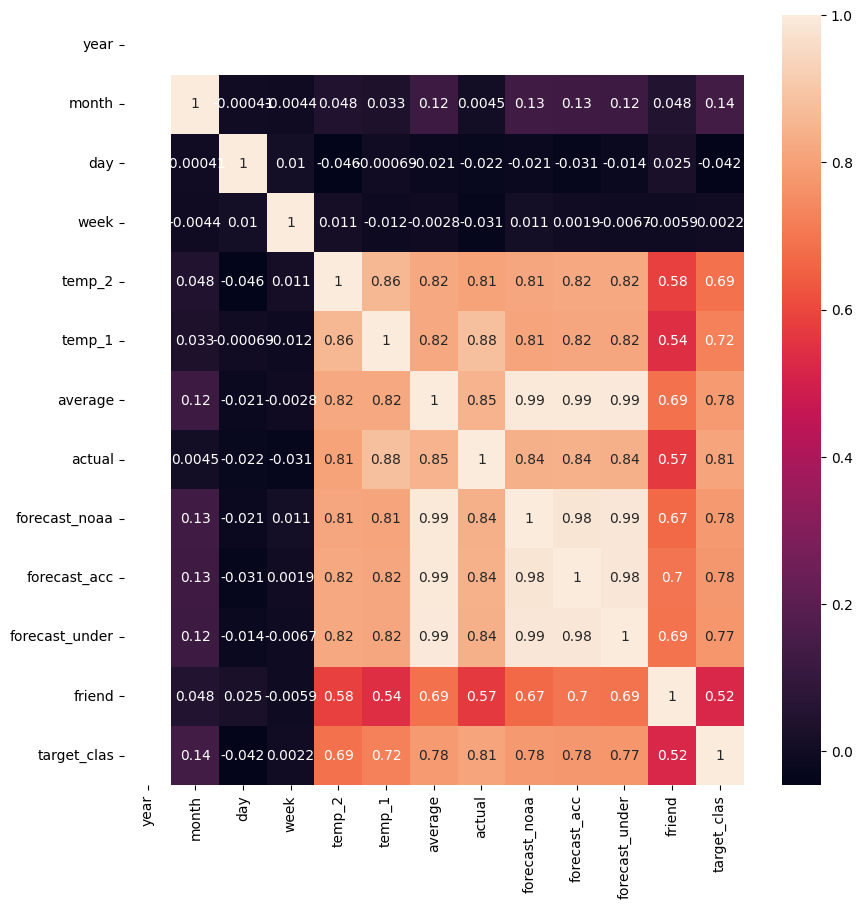

In [137]:
plt.figure(figsize=(10,10))
sns.heatmap(temps.corr(), annot=True)

In [139]:
temps['target_clas'].value_counts()

target_clas
1    204
0    144
Name: count, dtype: int64

In [140]:
X_train, X_test, y_train, y_test = train_test_split(temps.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [146]:
# ENTRENA UN MODELO DE CLASIFICACION LLAMADO dtc
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)



DecisionTreeClassifier()

In [147]:
X_train.columns

Index(['month', 'temp_2', 'temp_1', 'average', 'forecast_noaa', 'forecast_acc',
       'forecast_under', 'friend'],
      dtype='object')

In [154]:
# dtc feature importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Suponiendo que tienes tus datos de características X_train, X_test e y_train, y_test

# Crear una instancia del modelo DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)

# Entrenar el modelo con los datos de entrenamiento
dtc.fit(X_train, y_train)

# Obtener la importancia de las características del modelo
feature_importance = dtc.feature_importances_

# Calcular las predicciones en el conjunto de prueba
y_pred = dtc.predict(X_test)



In [155]:
# accuracy de dtc en test

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la importancia de las características y la precisión
print("Feature Importance:", feature_importance)
print("Accuracy:", accuracy)

Feature Importance: [0.         0.         0.09828577 0.83792502 0.05793051 0.
 0.         0.0058587 ]
Accuracy: 0.9142857142857143


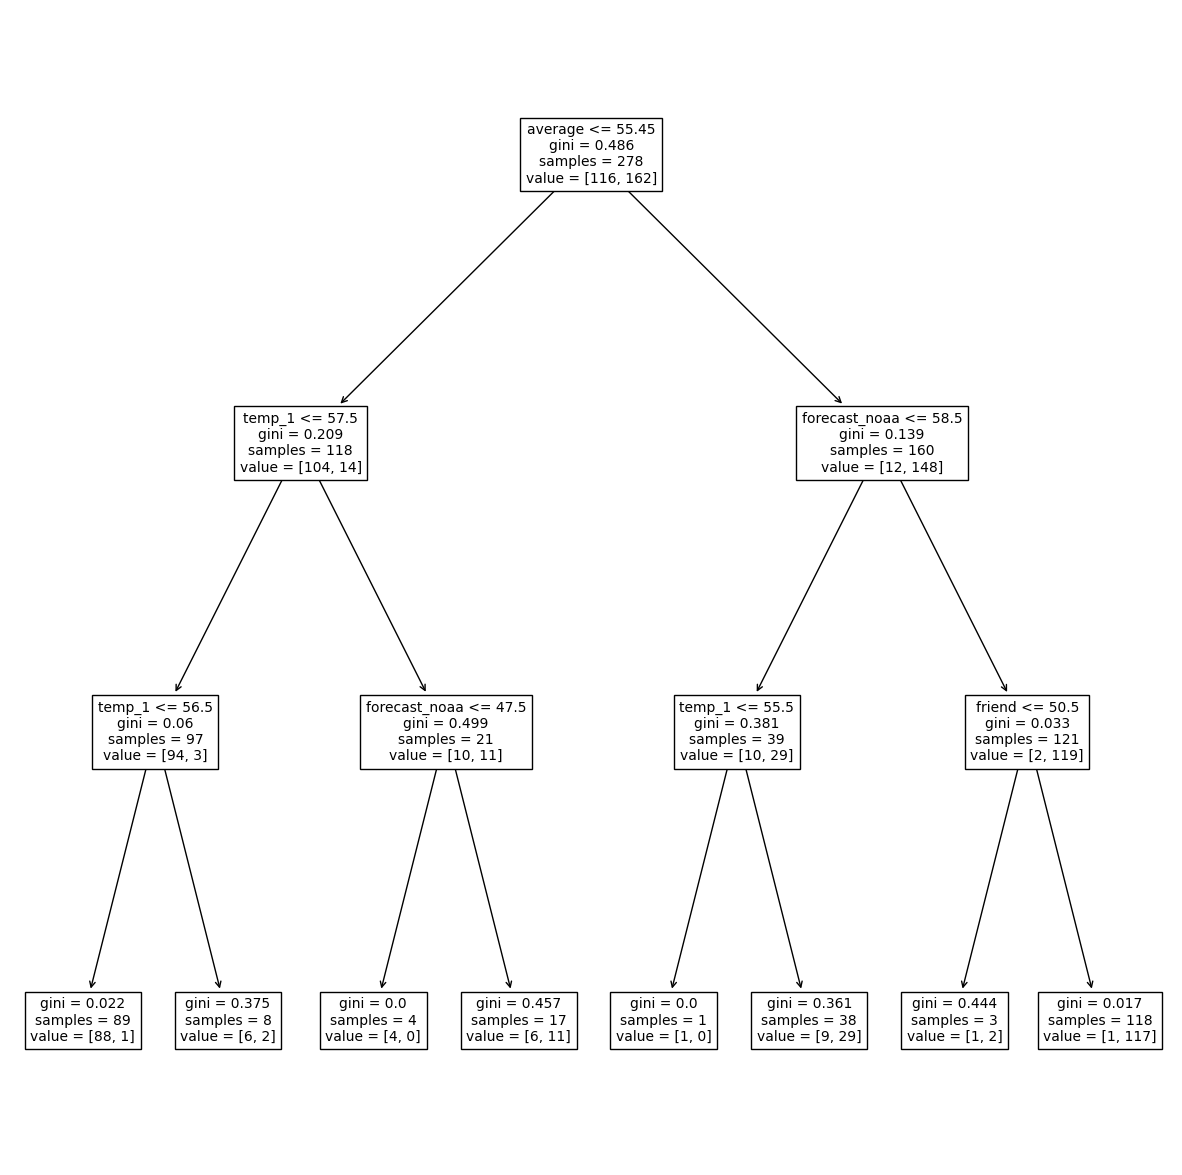

In [156]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, fontsize=10); #max_depth cambia la profundidad de la visualización

COMPARA LA ACCURACY CON UN LOGISTIC REGRESSOR A PELO

In [157]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit


<bound method LogisticRegression.fit of LogisticRegression()>

In [158]:
accuracy_score(y_test, y_pred)


0.9142857142857143

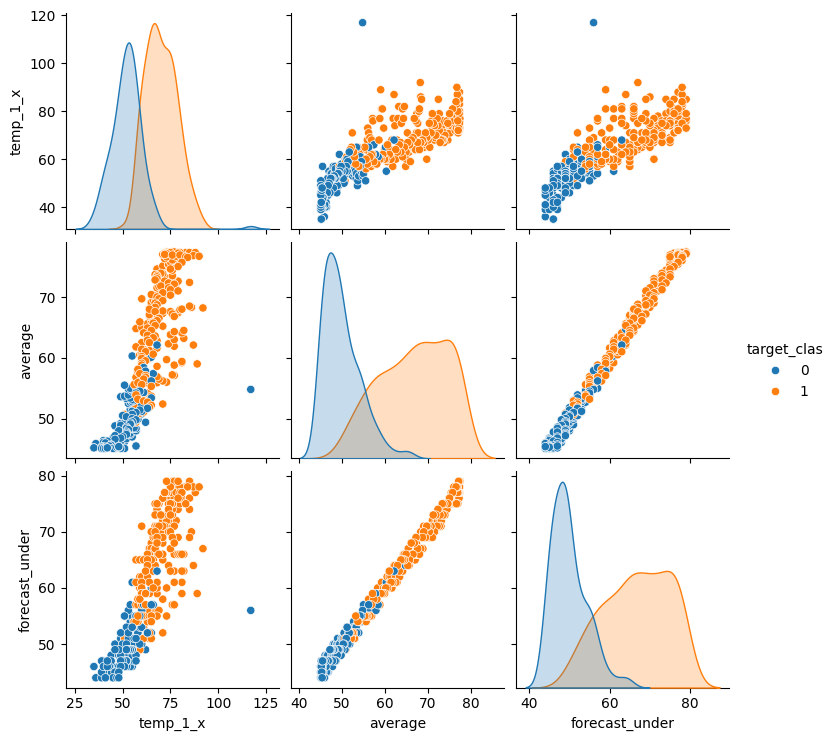

In [160]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')

### 12. BONUS TRACK: Repite el experimEnto con un un nuevo modelo `RandomForestClassifier` . A lo facil

In [98]:
from sklearn.ensemble import RandomForestClassifier

rfc = ...

RandomForestClassifier(max_depth=3)

In [99]:
accuracy_score(y_test,rfc.predict(X_test))

0.9428571428571428